<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 200px; display: inline" alt="IMT"/> </a>
</center>

# [Ateliers: Technologies des grosses data](https://github.com/wikistat/Ateliers-Big-Data)

# [Reconnaissance de caractères manuscrits](https://github.com/wikistat/Ateliers-Big-Data/2-MNIST) ([MNIST](http://yann.lecun.com/exdb/mnist/)) en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> avec <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-Learn"/></a>

# <FONT COLOR="Red">Day 1</font>

## 1 Introduction

### 1.1 Objectif

Même traitement sur les mêmes données cette fois avec Python.

### 1.2 Lecture des données d'apprentissage et de test

In [1]:
# Graphiques dans la fenêtre
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

Les données peuvent être préalablement téléchargées ou directement lues. Ce sont celles originales du site [MNIST DataBase](http://yann.lecun.com/exdb/mnist/) mais préalablement converties au format .csv, certes plus volumineux mais plus facile à lire. Attention le fichier `mnist_train.zip` présent dans le dépôt est compressé. 

In [3]:
# Lecture des données d'apprentissage
path="http://www.math.univ-toulouse.fr/~besse/Wikistat/data/"
Dtrain=pd.read_csv(path+"mnist_train.csv",header=None)
Dtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [4]:
# Extraction puis suppression de la dernière colonne des labels
Ltrain=Dtrain.iloc[:,784]
Dtrain.drop(Dtrain.columns[[784]], axis=1,inplace=True)
Dtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Dimensions de l'échantillon
Dtrain.shape

(60000, 784)

In [6]:
# Même chose pour les données de test
Dtest=pd.read_csv(path+"mnist_test.csv",header=None)
Ltest=Dtest.iloc[:,784]
Dtest.drop(Dtest.columns[[784]], axis=1,inplace=True)
Dtest.shape

(10000, 784)

/home-local/pbesse/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


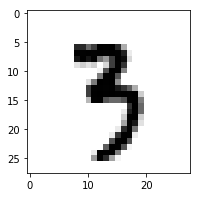

In [7]:
# affichage d'un chiffre
plt.figure(1, figsize=(3, 3))
plt.imshow(np.matrix(Dtest.iloc[1,:]).reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

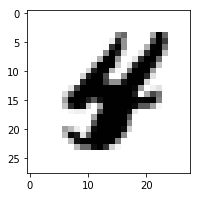

In [8]:
plt.figure(1, figsize=(3, 3))
plt.imshow(np.matrix(Dtest.iloc[10,:]).reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### 1.3 Exploration

Les données ont déjà été normalisées centrées et sont complètes. Elles ne nécessitent pas d'autre "nettoyage" au moins rudimentaire.

Le [tutoriel](http://wikistat.fr/pdf/st-tutor3-python-scikit.pdf) d'introduction à Scikit-learn montre comment représenter les images des caractères ainsi qu'une ACP qui n'est pas reprise ici. Quelles sont néanmoins les performances de k-means sur un tel volume ?

**Ajouter ACP**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
tps1 = time.clock()
km=KMeans(n_clusters=10,init='k-means++', 
   n_init=10, max_iter=100, tol=0.01,
   precompute_distances=True, verbose=0, 
   random_state=None, copy_x=True, n_jobs=-1)
km.fit(Dtrain)
tps2 = time.clock()
print("Temps execution Kmeans :", (tps2 - tps1)/60)

In [ ]:
cm = confusion_matrix(Ltrain, km.labels_)
print(cm)

Résultat sans grand intérêt mais qui montre la difficulté de regouper les caractères identiques à l'aide de la distance euclidienne usuelle; il y a beaucoup de confusion entre les classes.

# <FONT COLOR="Red">Day 2</font>

##  $K$ nearest neighboors

In [ ]:
# Définition du modèle avec un nombre k "standard" de voisins
from sklearn.neighbors import KNeighborsClassifier
tps1 = time.clock()
knn = KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
digit_knn=knn.fit(Dtrain, Ltrain) 
tps2 = time.clock()
print("Temps de k-nn :",(tps2 - tps1)/60)

In [ ]:
# Apprentissage et estimation de l'erreur de prévision sur l'échantillon test
tps1 = time.clock()
erreur=1-digit_knn.score(Dtest,Ltest)
tps2 = time.clock()
print("Temps:",(tps2 - tps1)/60,"Erreur:",erreur)

Il faudrait ré-appliquer la procédure d'otpimisation de $k$ par validation croisée décrite dans le [tutoriel](http://wikistat.fr/pdf/st-tutor3-python-scikit.pdf) d'introduction à scikit-learn. Néanmoins la solution $k=10$ est raisonnable et on retrouve une performance classique sur ce type de données: 3.3%, pour une méthode utilisée sans raffinement. 

C'est en effet une autre distance qu'il faudrait utiliser avec les $k$ plus proches voisins pour améliorer sensiblement les résultats mais avec un coût beaucoup plus élevé en temps de calcul. Un autre [scénario](http://wikistat.fr/pdf/st-atelier-MINST-tangent-ditance.pdf) propose ainsi le calcul d'une distance tangentielle entre les images ([Simard et al. (1998)](https://hal-ens.archives-ouvertes.fr/file/index/docid/60948/filename/Tangent_distance.pdf)). Le programme Matlab fait appel à un programme en C. L'intégration dans du code python plutôt que Matlab resterait à faire...

# <FONT COLOR="Red">Day 3</font>

## Random forest

Les forêts aléatoires sont également une approche raisonnable, à moindre coût de développement, sur ces données. Analyser en détail la liste des paramètres proposés dans l'implémentation de cet algorithme. Consulter pour ce faire la [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) en ligne.

Les valeurs par défaut des paramètres sont utilisées sauf pour le nombre d'arbres: 100 au lieu de 10, et le nombre de processeurs utilisés: -1 au lieu de 1 (tous sont utilisés sauf 1 pour le système). Attention, tous les paramètres disponibles ne sont pas listés.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
tps0 = time.clock()
rf = RandomForestClassifier(n_estimators=100, 
   criterion='gini', max_depth=None, min_samples_split=2, 
   min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, 
   bootstrap=True, oob_score=True, n_jobs=-1,random_state=None, verbose=0)
rf.fit(Dtrain,Ltrain)
tps1 = time.clock()
print("Temps de configutration RF :" ,tps1 - tps0)

In [ ]:
# erreur out-of-bag
erreur_oob=1-rf.oob_score_
tps2 = time.clock()
print("Temps execution RF :", tps2 - tps0, "Erreur oob:", erreur_oob)


In [ ]:
# erreur sur l'échantillon test
1-rf.score(Dtest,Ltest)

In [ ]:
cm = confusion_matrix(Ltest, rf.predict(Dtest))
print(cm)

Comme pour les $k$ plus proches voisins, il serait utile d'optimiser certains paramètres dont le nombre d'arbres et sans doute *max_features*. L'optimisation de l'erreur *out-of-bag* plutôt qu'une procédure lourde  de validaiton croisée serait bienvenue. D'autre part, la restriction de la profondeur max des arbres pourrait réduire sensiblement les temps de calcul mais cela ne semble pas nécessaire d'autant que c'est un paramètre critique pour la qualité de la prévision.


## Neural network

In [9]:
import keras.utils as ku
import keras.models as km
import keras.layers as kl
import keras.optimizers as ko

Using TensorFlow backend.


In [10]:
# Lecture des données d'apprentissage
N_classes = 10

# path="" # Si les données sont dans le répertoire courant sinon:
# path="../2-MNIST/"
# Dtrain=pd.read_csv(path+"mnist_train.csv",header=None)
X_train = Dtrain
Y_train = Ltrain

# Dtest=pd.read_csv(path+"mnist_test.csv",header=None)
X_test = Dtest
Y_test = Ltest

In [11]:
Y_train_cat = ku.to_categorical(Y_train, N_classes)
Y_test_cat = ku.to_categorical(Y_test, N_classes)

With a normalisation that is really important

In [ ]:
# Data normalization
X_train_norm = X_train/255
X_test_norm = X_test/255

batch_size = 128
epochs = 20

model = km.Sequential()
model.add(kl.Dense(512, activation='relu', input_shape=(784,)))
model.add(kl.Dropout(0.2))
model.add(kl.Dense(512, activation='relu'))
model.add(kl.Dropout(0.2))
model.add(kl.Dense(N_classes, activation='softmax'))
model.summary()
# Apprentissage
model.compile(loss='categorical_crossentropy',
              optimizer=ko.RMSprop(),
              metrics=['accuracy'])
ts=time.time()
history = model.fit(X_train_norm, Y_train_cat,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test_norm, Y_test_cat))
te=time.time()
t_train_mpl_norm = te-ts

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.243

In [22]:
score_mpl_norm = model.evaluate(X_test, Y_test_cat, verbose=0)
predict_mpl_norm = model.predict(X_test)
print('Test loss:', score_mpl_norm[0])
print('Test accuracy:', score_mpl_norm[1])
print("Time Running: %.2f seconds" %t_train_mpl_norm )
pd.DataFrame(confusion_matrix(Y_test, predict_mpl_norm.argmax(1)))

Test loss: 0.278151943779
Test accuracy: 0.9827
Time Running: 325.15 seconds


,0,1,2,3,4,5,6,7,8,9
0,975,1,0,1,0,1,0,1,1,0
1,1,1124,3,1,0,1,1,1,3,0
2,6,0,1008,2,4,0,2,7,2,1
3,0,0,2,995,0,2,0,6,3,2
4,1,0,0,0,965,0,6,3,0,7
5,3,0,0,12,1,868,2,1,4,1
6,5,2,0,1,3,3,943,0,1,0
7,0,1,6,0,0,0,0,1019,0,2
8,6,1,1,7,2,0,1,8,946,2
9,2,2,0,2,9,1,0,8,1,984


## 5 Convolutional Network
Les propriété d'invariance par translation introduites par les couches opérant une convolution des images ont un impact important sur la qualité des résultats.
### Réseau
Test d'un réseau de convolution constitué de 7 couches: 

* Une couche de convolution 2D, avec fenêtre de taille 3x3 et une fonction d'activation *relu*
* Une couche de convolution 2D, avec fenêtre de taille 3x3 et une fonction d'activation *relu*
* Une couche max pooling de fenêtre 2x2
* Une couche *dropout* où 25% des neurones sont desactivés
* Une couche *Flatten* transforme les images $N \times N$ en vecteurs $N^2$.
* Une couche classique de 128 neurones
* Une couche dropout ou 50% des neurones sont desactivés

Une couche *softmax* fournit la classification

### Format des données

Dans les exemples précédents. Les données était "applaties". Une imade de $28\times 28=784$ pixels est considérée comme un vecteur. 

Pour pouvoir utiliser le principe de la convolution la structure des images est conservée. Une image n'est pas un vecteur de tailles $784\times 1$ mais une matrice de taille $28\times 28$. Ainsi `X_train` est réorganisée en cube ou multitableau de dimensions $60000\times 28\times 28$ pour être utilisé dans un réseau de convolution.

Avec **Keras** `X_train` doit même être de dimensions $60000\times 28\times 28\times 1$. La dernière dimension, de taille 1 peut paraitre inutile car dans le cas des données *MNIST* les pixels ne sont décrits qu'avec un seul niveau de gris. Cependant, des images couleurs en RGB sont généralement codées avec trois niveaux d'intensité (Rouge, Vert et Bleus) correspondant à la quatrième dimension comportant 3 valeurs. 

Noter également que l'utilisation des couches de convolution rend inutile la normalisation préalable des données.

In [24]:
X_train_conv = X_train.values.reshape(60000, 28, 28, 1)
X_test_conv = X_test.values.reshape(10000, 28, 28, 1)

In [ ]:
# descrition du réseau
model = km.Sequential()
model.add(kl.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28, 1), data_format="channels_last"))
model.add(kl.Conv2D(64, (3, 3), activation='relu'))
model.add(kl.MaxPooling2D(pool_size=(2, 2)))
model.add(kl.Dropout(0.25))
model.add(kl.Flatten())
model.add(kl.Dense(128, activation='relu'))
model.add(kl.Dropout(0.5))
model.add(kl.Dense(N_classes, activation='softmax'))
# Résumé
model.summary()

In [25]:
# Apprentissage
model.compile(loss="categorical_crossentropy",
              optimizer=ko.Adadelta(),
              metrics=['accuracy'])
ts=time.time()
model.fit(X_train_conv, Y_train_cat,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_conv, Y_test_cat))
te=time.time()
t_train_conv = te-ts

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
__________

In [26]:
score_conv = model.evaluate(X_test_conv, Y_test_cat, verbose=0)
predict_conv = model.predict(X_test_conv)
print('Test loss:', score_conv[0])
print('Test accuracy:', score_conv[1])
print("Time Running: %.2f seconds" %t_train_conv )
pd.DataFrame(confusion_matrix(Y_test, predict_conv.argmax(1)))

Test loss: 0.045543774603
Test accuracy: 0.9902
Time Running: 2414.81 seconds


,0,1,2,3,4,5,6,7,8,9
0,975,0,2,0,0,0,1,1,1,0
1,0,1131,2,1,0,1,0,0,0,0
2,1,1,1024,0,1,0,1,4,0,0
3,0,0,1,1003,0,3,0,2,1,0
4,0,0,0,0,970,0,4,0,2,6
5,1,0,1,5,0,882,1,0,1,1
6,4,3,0,0,1,1,948,0,1,0
7,0,3,7,0,1,0,0,1013,1,3
8,3,0,2,1,0,1,0,1,965,1
9,1,1,0,4,4,2,0,3,3,991
